#  Null Value Computation

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [49]:
# set seed for reproducibility
SEED = 20
np.random.seed(SEED)

In [50]:
# Loading Data
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [51]:
print('Total zero Glucose values: ' + str(768-df['Glucose'].astype(bool).sum(axis=0)))
print('Total zero BloodPressure values: ' + str(768-df['BloodPressure'].astype(bool).sum(axis=0)))
print('Total zero SkinThickness values: ' + str(768-df['SkinThickness'].astype(bool).sum(axis=0)))
print('Total zero Insulin values: ' + str(768-df['Insulin'].astype(bool).sum(axis=0)))
print('Total zero BMI values: ' + str(768-df['BMI'].astype(bool).sum(axis=0)))
print('Total zero DiabetesPedigreeFunction values: ' + str(768-df['DiabetesPedigreeFunction'].astype(bool).sum(axis=0)))
print('Total zero Age values: ' + str(768-df['Age'].astype(bool).sum(axis=0)))
# These are all 0 values out of 768 in each field.
# We saw outliers during our data viz. Now we need to handle these
# Total zero values in DiabetesPedigreeFunction and Age variable is zero.
# Pregnancy field can be 0.

Total zero Glucose values: 5
Total zero BloodPressure values: 35
Total zero SkinThickness values: 227
Total zero Insulin values: 374
Total zero BMI values: 11
Total zero DiabetesPedigreeFunction values: 0
Total zero Age values: 0


In [52]:
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})  
replace_zero(df)

In [53]:
import pandas as pd

# Assuming you have a DataFrame called df
df_nan = df.copy()  # Create a copy of the original DataFrame

# Perform the desired operations
df_nan = df_nan.replace(0, pd.NA)

# Check for null values
print(df_nan.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [54]:
# Now we need to handle Nulls somehow
# to find the median for filling null values
# Function outputs median value for mentioned variable based on Outcome var
def replace_zero(df):
    df_nan=df.copy(deep=True)
    cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
    df_nan[cols] = df_nan[cols].replace({0:np.nan})
    return df_nan
df_nan=replace_zero(df)

In [55]:
import pandas as pd

# Assuming you have a DataFrame called df_nan
find_median = df_nan['Glucose'].median()

# Use the median value as needed
print(find_median)

117.0


In [56]:
import pandas as pd

def find_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    return median_value

# Example usage:
# Assuming df_nan is your DataFrame containing NaN values
# Replace df_nan with your actual DataFrame name
# Replace 'Glucose' with the column name you want to find the median for
median_glucose = find_median(df_nan, 'Glucose')
print("Median Glucose Value:", median_glucose)

# Assuming 107 is the median value for Glucose var for non-diabetic people
# Assuming 140 is the median value for Glucose var for diabetic people


Median Glucose Value: 117.0


In [57]:
# Function to replace Null values with relevant median values
# returns number of Null values after computation (Should return 0 when called)
def replace_null(frame,var):
    median_df=find_median(frame,var)
    var_0=median_df[var].iloc[0]
    var_1=median_df[var].iloc[1]
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = var_0
    frame.loc[(frame['Outcome'] == 1) & (frame[var].isnull()), var] = var_1
    return frame[var].isnull().sum()

In [58]:
import pandas as pd

def find_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    return median_value

def replace_null(frame, var):
    median_value = find_median(frame, var)
    frame.loc[(frame['Outcome'] == 0) & (frame[var].isnull()), var] = median_value

# Example usage:
# Assuming df_nan is your DataFrame containing NaN values
# Replace df_nan with your actual DataFrame name

replace_null(df_nan, 'Glucose')
print(str(df_nan['Glucose'].isnull().sum()) + ' Nulls for Glucose')

replace_null(df_nan, 'SkinThickness')
print(str(df_nan['SkinThickness'].isnull().sum()) + ' Nulls for SkinThickness')

replace_null(df_nan, 'Insulin')
print(str(df_nan['Insulin'].isnull().sum()) + ' Nulls for Insulin')


2 Nulls for Glucose
88 Nulls for SkinThickness
138 Nulls for Insulin


In [59]:
print(str(replace_null(df_nan,'Glucose'))+ ' Nulls for Glucose')
print(str(replace_null(df_nan,'SkinThickness'))+ ' Nulls for SkinThickness')
print(str(replace_null(df_nan,'Insulin'))+ ' Nulls for Insulin')
print(str(replace_null(df_nan,'BMI'))+ ' Nulls for BMI')
print(str(replace_null(df_nan,'BloodPressure'))+ ' Nulls for BloodPressure')
# We have successfully handled Nulls

None Nulls for Glucose
None Nulls for SkinThickness
None Nulls for Insulin
None Nulls for BMI
None Nulls for BloodPressure


In [60]:
df_nan.isnull().sum()
# Just a confirmation

Pregnancies                   0
Glucose                       2
BloodPressure                16
SkinThickness                88
Insulin                     138
BMI                           2
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

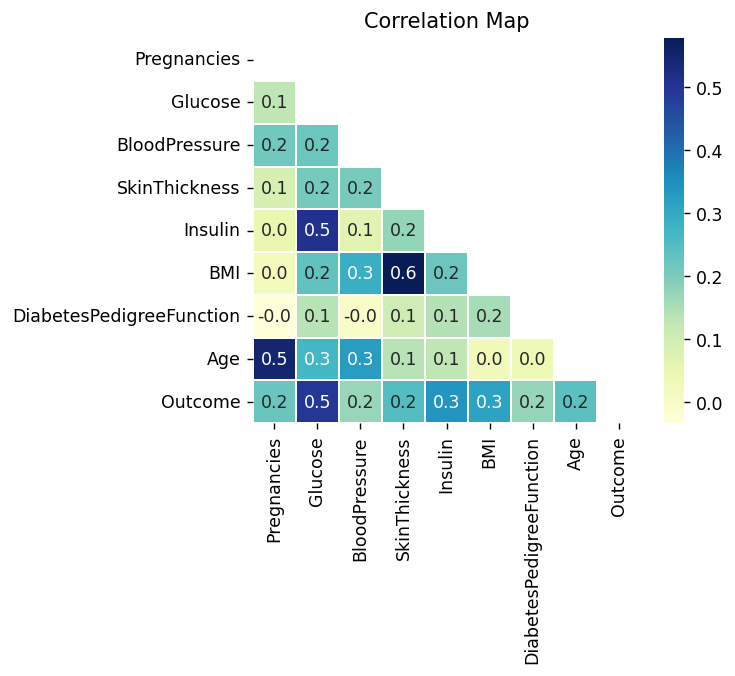

In [61]:
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df_nan.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()
# New Correlation map has higher correlated values